In [26]:
# Closed and merge_ready tickets for component Core Tor modified on April 2019
# Query https://trac.torproject.org/projects/tor/query?status=closed&status=merge_ready&changetime=1+abr.+2019..30+abr.+2019&component=%5ECore+Tor&col=id&col=summary&col=component&col=status&col=type&col=priority&col=milestone&col=severity&col=actualpoints&col=points&col=sponsor&col=keywords&order=priority

csv_path='/Users/gaba/Code/torproject/trac/datasets/2019_april_closed_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)


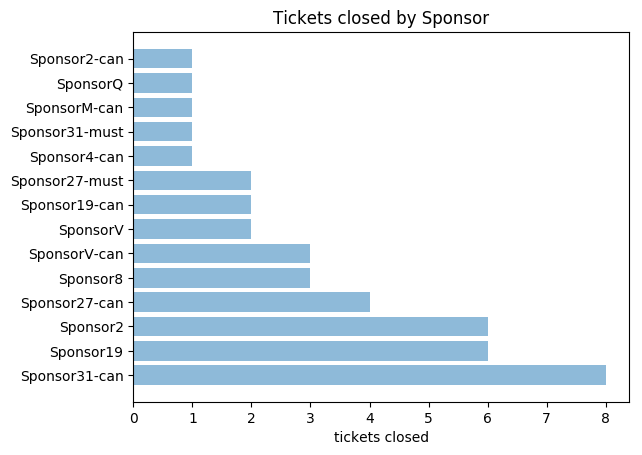

In [15]:
# which sponsors got ticket closed
sponsors_by_tickets_closed = csv_file['Sponsor'].value_counts()

objects = tuple(sponsors_by_tickets_closed.keys())
y_pos = np.arange(len(objects))
performance = list(sponsors_by_tickets_closed)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets closed')
plt.title('Tickets closed by Sponsor')

plt.show()

In [16]:
# who closed tickets
csv_file['Owner'].value_counts()

teor           30
nickm          18
juga           16
atagar          7
rl1987          5
neel            4
dgoulet         3
mikeperry       2
pastly          1
catalyst        1
traumschule     1
yawning         1
Name: Owner, dtype: int64

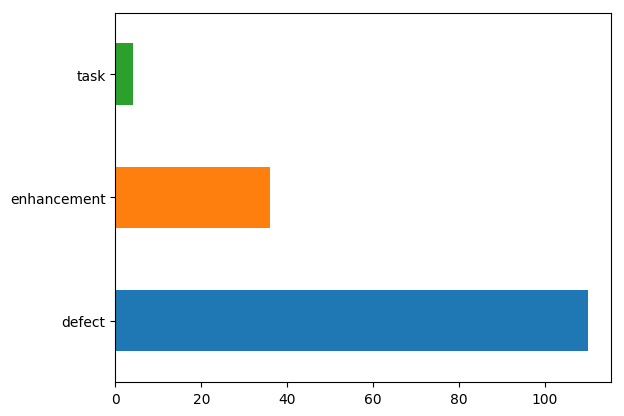

In [17]:
# What type of tickets we got
csv_file['Type'].value_counts().plot.barh()

In [18]:
# How many high and very high tickets
csv_file['Priority'].value_counts()

Medium       125
High          12
Low            8
Very High      3
Immediate      1
Very Low       1
Name: Priority, dtype: int64

In [8]:
# which milestone the tickets were for
csv_file['Milestone'].value_counts()

Tor: 0.4.1.x-final    9
Tor: 0.4.0.x-final    6
Tor: 0.3.5.x-final    5
Tor: unspecified      1
Tor: 0.3.4.x-final    1
Name: Milestone, dtype: int64

In [19]:
# How many 'big' tickets got resolved
csv_file['Points'].value_counts()


0.1     27
1.0     16
0.2     12
0.5      9
0.0      6
3.0      4
0.3      2
15.0     2
2.0      2
10.0     2
Name: Points, dtype: int64

In [27]:
# How tickets got resolved
csv_file['Resolution'].value_counts()

fixed               85
implemented         22
duplicate           13
wontfix              8
not a bug            7
user disappeared     2
worksforme           2
invalid              1
Name: Resolution, dtype: int64

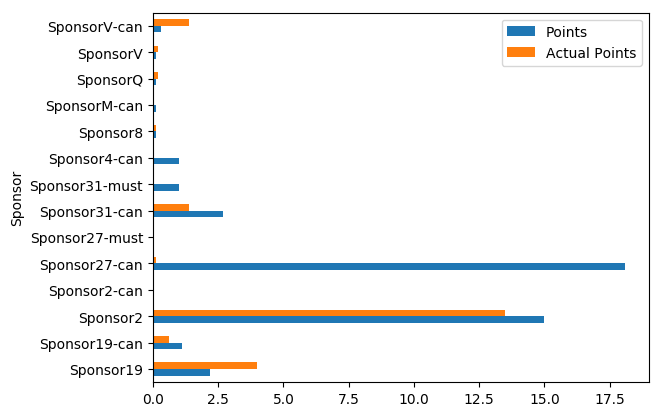

In [28]:
# How many days took to complete the ticket versus estimation
csv_file.filter(items=['Sponsor', 'Points', 'Actual Points']).groupby('Sponsor').sum().plot.barh()



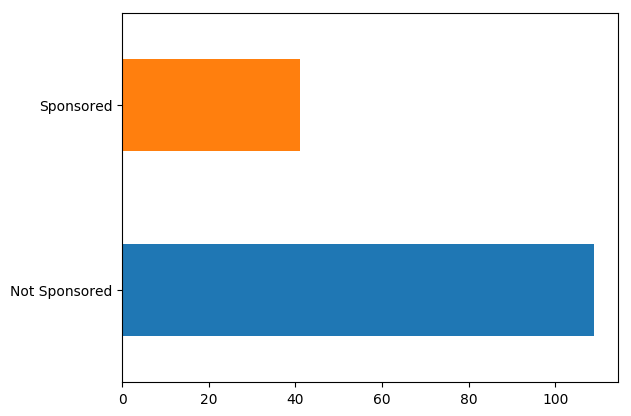

In [42]:
# How much work was not sponsored

sponsor_not_work = csv_file['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_not_work.plot.barh()
